<a href="https://colab.research.google.com/github/saiful1604008/Thesis/blob/main/Tanha.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import cv2 as cv
import os 
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

from keras.layers import Conv2D,MaxPooling2D,Dropout,Dense,Flatten
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

In [3]:
train = '/content/drive/MyDrive/train-data-3/'
test = '/content/drive/MyDrive/test-data3/'
num_classes = 2

In [4]:
datagen = ImageDataGenerator(
    rescale = 1.0/255,
    validation_split = 0.25
)

train_gen = datagen.flow_from_directory(
    directory= train,
    target_size = (150,300),
    batch_size = 30,
    color_mode = 'rgb',
    shuffle = True,
    class_mode = 'binary'
)

valid_gen = datagen.flow_from_directory(
    directory= test,
    target_size = (150,300),
    batch_size = 30,
    color_mode = 'rgb',
    shuffle = False,
    class_mode = 'binary'

)

Found 1785 images belonging to 2 classes.
Found 418 images belonging to 2 classes.


In [5]:
input_shape = train_gen.image_shape
input_shape

(150, 300, 3)

In [6]:
valid_gen.class_indices

{'melanoma': 0, 'non-melanoma': 1}

In [7]:
model = Sequential([
                    Conv2D(16,(6,6),
                            strides=2,
                            activation="relu",
                            padding='same',
                            input_shape=input_shape),
                    MaxPooling2D(pool_size = 2,strides=1),
                    Dropout(0.5),
                    Conv2D(32,(3,3),
                           strides=1,
                           padding="same",
                           activation="relu"),
                    MaxPooling2D(pool_size = 2,strides = 1),
                    Dropout(0.5),
                    Conv2D(64,(3,3),
                           strides=1,
                           padding="same",
                           activation="relu"),
                    MaxPooling2D(pool_size = 2,strides = 1),
                    Dropout(0.5),
                    
                    Flatten(),
                    Dense(256,activation = 'relu'),
                    Dropout(0.5),
                    Dense(2,activation = 'softmax')
                    
])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 75, 150, 16)       1744      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 149, 16)      0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 74, 149, 16)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 74, 149, 32)       4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 148, 32)      0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 73, 148, 32)       0

In [9]:
callback_list = EarlyStopping(monitor = 'val_loss',
                              patience = 20,
                              restore_best_weights=True)

In [10]:
model.compile(loss = 'sparse_categorical_crossentropy',
              optimizer = Adam(learning_rate = 0.0005),
              metrics = ['accuracy'])

In [11]:
Epoch = 150
batchSize = 32

history = model.fit(train_gen,
                    batch_size = batchSize,
                    epochs=Epoch,
                    callbacks=[callback_list],
                    validation_data=valid_gen,
                    verbose = 1)

Epoch 1/150
60/60 [==============================] - 573s 9s/step - loss: 9.0196 - accuracy: 0.4868 - val_loss: 0.6931 - val_accuracy: 0.6531
Epoch 2/150
60/60 [==============================] - 301s 5s/step - loss: 0.6668 - accuracy: 0.5815 - val_loss: 0.6862 - val_accuracy: 0.6220
Epoch 3/150
60/60 [==============================] - 292s 5s/step - loss: 0.6019 - accuracy: 0.6700 - val_loss: 0.6691 - val_accuracy: 0.5622
Epoch 4/150
60/60 [==============================] - 296s 5s/step - loss: 0.5673 - accuracy: 0.7036 - val_loss: 0.6189 - val_accuracy: 0.6938
Epoch 5/150
60/60 [==============================] - 291s 5s/step - loss: 0.5486 - accuracy: 0.7255 - val_loss: 0.6090 - val_accuracy: 0.6675
Epoch 6/150
60/60 [==============================] - 302s 5s/step - loss: 0.5415 - accuracy: 0.7232 - val_loss: 0.6117 - val_accuracy: 0.6699
Epoch 7/150
60/60 [==============================] - 292s 5s/step - loss: 0.5295 - accuracy: 0.7434 - val_loss: 0.5664 - val_accuracy: 0.7297
Epoch 

In [12]:
model.evaluate(train_gen)

60/60 [==============================] - 97s 2s/step - loss: 0.1675 - accuracy: 0.9490


[0.1675422042608261, 0.9490196108818054]

In [13]:
model.evaluate(valid_gen)

14/14 [==============================] - 20s 1s/step - loss: 0.4051 - accuracy: 0.8421


[0.40508463978767395, 0.8421052694320679]

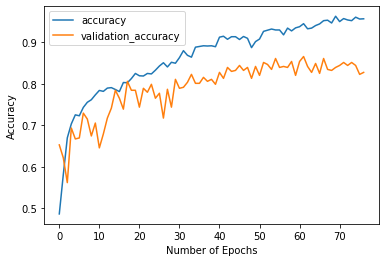

In [24]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='validation_accuracy')
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

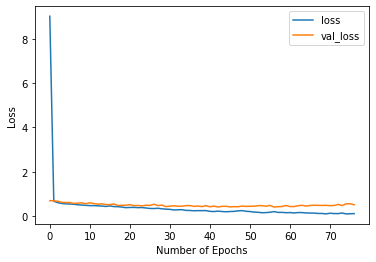

In [25]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [26]:
from sklearn.metrics import classification_report, confusion_matrix

target_names = []

for key in train_gen.class_indices:
    target_names.append(key)


y_pred = model.predict_generator(valid_gen)
y_pred = np.argmax(y_pred, axis=1)
print('Confusion Matrix')
cm = confusion_matrix(valid_gen.classes, y_pred)

print (cm)

print('\n')

print('Classification Report')
print(classification_report(valid_gen.classes, y_pred, target_names=target_names))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  if __name__ == '__main__':


Confusion Matrix
[[166  45]
 [ 21 186]]


Classification Report
              precision    recall  f1-score   support

    melanoma       0.89      0.79      0.83       211
non-melanoma       0.81      0.90      0.85       207

    accuracy                           0.84       418
   macro avg       0.85      0.84      0.84       418
weighted avg       0.85      0.84      0.84       418



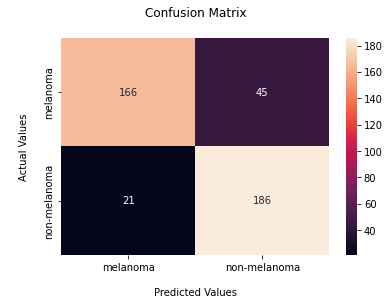

In [27]:
ax = sns.heatmap(cm, fmt = '' ,annot=True)
ax.set_title('Confusion Matrix\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('\nActual Values\n');

ax.xaxis.set_ticklabels(['melanoma','non-melanoma'])
ax.yaxis.set_ticklabels(['melanoma','non-melanoma'])

plt.show()

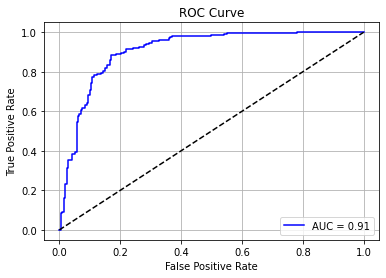

In [18]:
import sklearn.metrics as metrics
y_pred_keras = model.predict(valid_gen)
preds = y_pred_keras[:,1]
fpr_keras, tpr_keras, thresholds_keras = metrics.roc_curve(valid_gen.classes, preds)
roc_auc = metrics.auc(fpr_keras, tpr_keras)

plt.title('ROC Curve')
plt.plot(fpr_keras, tpr_keras, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'k--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.grid()
plt.show()

In [19]:
from tensorflow.keras.preprocessing import image

In [ ]:
import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/test-data3/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [21]:
def predict(file_name):
    image1 = image.load_img(file_name,target_size=(150,300))
    plt.imshow(image1)
    Y = image.img_to_array(image1)
    X = np.expand_dims(Y,axis=0)
    value = model.predict(X)
    v = np.argmax(value)
    print(v)
    if v == 1: 
        plt.xlabel("non-melanoma",fontsize= 20)
    elif v == 0:
        
        plt.xlabel("melanoma",fontsize= 20)

0


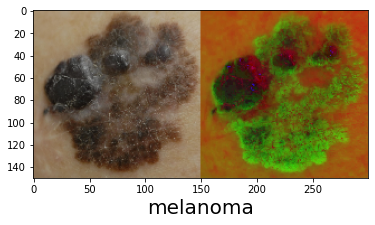

In [22]:
predict('/content/drive/MyDrive/test-data3/melanoma/1685446.jpg')

1


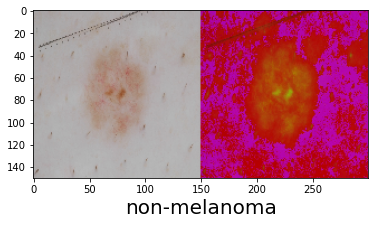

In [23]:
predict('/content/drive/MyDrive/test-data3/non-melanoma/ISIC_0000492.jpg')